In [7]:
import numpy as np
import scipy.stats
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import itertools
import patsy
import sklearn.linear_model
%matplotlib inline

# Q1

In [6]:
lam = 2
n = 20
alpha = 0.05

In [15]:
count = 0
T = 1000
for i in range(T):
    trial = np.random.poisson(lam,n)
    lamhat = trial.mean()
    sehat = (1/(n/lamhat))**(0.5)
    wn = (lamhat-lam)/sehat
    p=2*(1-scipy.stats.norm.cdf(abs(wn)))
    if p < alpha:
        count+=1
print("False reject with rate = "+str(count/T))

False reject with rate = 0.038


In [30]:
(tauhat - tau) / sehat

0.35282093366578104

In [74]:
tau = math.log(2)
count2 = 0
for i in range(T):
    trail = np.random.poisson(lam,n)
    tauhat = np.log(trial.mean())
    sehat = 1/ math.sqrt(n*trail.mean())
    wn = (tauhat -tau) / sehat
    p=2*(1-scipy.stats.norm.cdf(abs(wn)))
    if p < alpha:
        count2+=1
print("False reject with rate = "+str(count2/T))

False reject with rate = 0.0


# Q4

In [81]:
red = pd.read_csv('C:/Users/Carmen/Desktop/winequality-red.csv')
wht = pd.read_csv('C:/Users/Carmen/Desktop/winequality-white.csv')

In [86]:
red.insert(0,'color',1)
wht.insert(0,'color',0)

In [98]:
df=pd.concat([red,wht])
print(df.shape)
df.head()

(6497, 13)


,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [256]:
idx = np.arange(df.shape[0])
random.shuffle(idx)
train = df.iloc[idx[:5000],:]
test = df.iloc[idx[5000:],:]

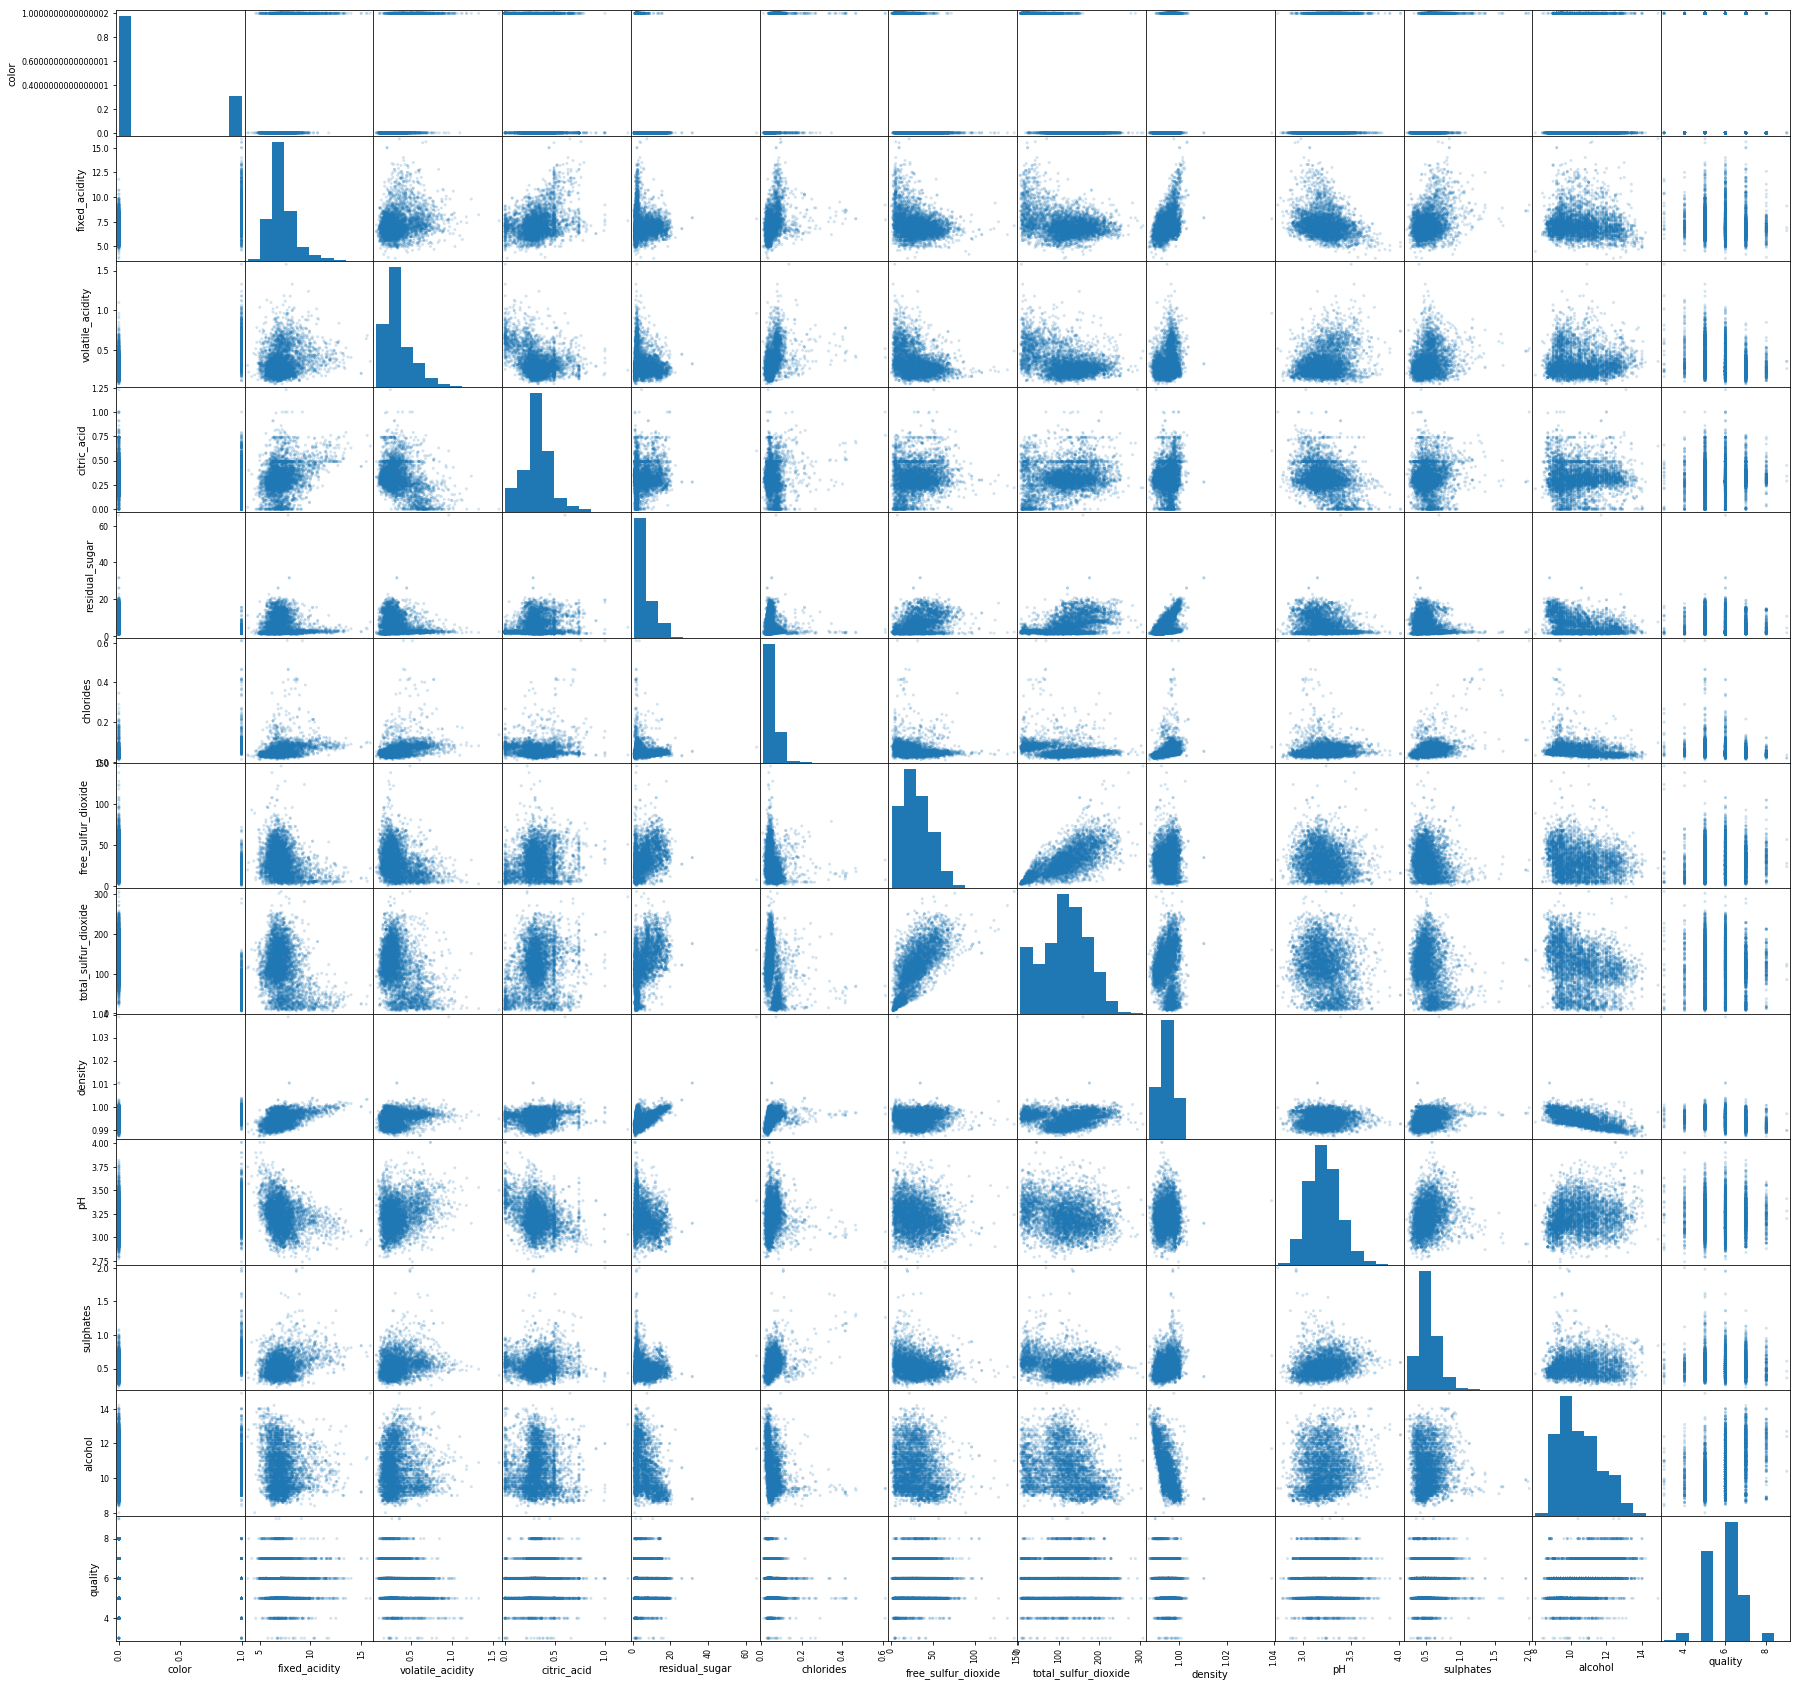

In [196]:
pd.plotting.scatter_matrix(train, alpha=0.2, figsize=(30, 30))
plt.show()

###### 2(d) Baseline

In [197]:
baseformula = 'quality ~ '+' + '.join(list(set(df.columns)-{'quality'}))
base = smf.ols(baseformula, data=train).fit()
base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:39:17   Log-Likelihood:                -5535.9
No. Observations:                5000   AIC:                         1.110e+04
Df Residuals:                    4987   BIC:                         1.118e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               92.8396     15.747      5.896      0.000      61.969     123.710
sulphates                0.6869      0.085      8.069      0.000       0.520       0.854
pH                       0.4713      0.103      4.555      0.000       0.268       0.674
alcohol                  0.2360      0.020     11.677      0.000       0.196       0.276
chlorides               -0.9533      0.371     -2.567      0.010      -1.681      -0.225
fixed_acidity            0.0756      0.018      4.202      0.000       0.040       0.111
total_sulfur_dioxide    -0.0014      0.000     -3.898      0.000      -0.002      -0.001
citric_acid             -0.0728      0.092     -0.795      0.427      -0.252       0.107
density                -92.2370     16.011     -5.761      0.000    -123.625     -60.849
color                    0.3207      0.064      5.015      0.000       0.195       0.446
volatile_acidity        -1.4185      0.093    -15.285      0.000      -1.600      -1.237
free_sulfur_dioxide      0.0055      0.001      6.198      0.000       0.004       0.007
residual_sugar           0.0563      0.007      8.403      0.000       0.043       0.069
==============================================================================
Omnibus:                      104.908   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.578
Skew:                           0.029   Prob(JB):                     3.82e-50
Kurtosis:                       4.044   Cond. No.                     2.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    m = smf.ols(baseformula, data=crostr).fit()
    record.append(r2_score(crosts.iloc[:,12], m.predict(crosts.iloc[:,:12])))
print('Cross Validation out-of-sample R-square = '+str(np.array(record).mean()))

Cross Validation out-of-sample R-square = 0.2876740820560557


###### 2(e) Transformed

In [218]:
transformula = 'quality ~ C(color)+ sulphates + pH + alcohol + chlorides + fixed_acidity + total_sulfur_dioxide + citric_acid + density + volatile_acidity + free_sulfur_dioxide + residual_sugar'
trans = smf.ols(transformula, data=train).fit()
trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     173.4
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:50:27   Log-Likelihood:                -5535.9
No. Observations:                5000   AIC:                         1.110e+04
Df Residuals:                    4987   BIC:                         1.118e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               92.8396     15.747      5.896      0.000      61.969     123.710
C(color)[T.1]            0.3207      0.064      5.015      0.000       0.195       0.446
sulphates                0.6869      0.085      8.069      0.000       0.520       0.854
pH                       0.4713      0.103      4.555      0.000       0.268       0.674
alcohol                  0.2360      0.020     11.677      0.000       0.196       0.276
chlorides               -0.9533      0.371     -2.567      0.010      -1.681      -0.225
fixed_acidity            0.0756      0.018      4.202      0.000       0.040       0.111
total_sulfur_dioxide    -0.0014      0.000     -3.898      0.000      -0.002      -0.001
citric_acid             -0.0728      0.092     -0.795      0.427      -0.252       0.107
density                -92.2370     16.011     -5.761      0.000    -123.625     -60.849
volatile_acidity        -1.4185      0.093    -15.285      0.000      -1.600      -1.237
free_sulfur_dioxide      0.0055      0.001      6.198      0.000       0.004       0.007
residual_sugar           0.0563      0.007      8.403      0.000       0.043       0.069
==============================================================================
Omnibus:                      104.908   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.578
Skew:                           0.029   Prob(JB):                     3.82e-50
Kurtosis:                       4.044   Cond. No.                     2.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    m = smf.ols(transformula, data=crostr).fit()
    record.append(r2_score(crosts.iloc[:,12], m.predict(crosts.iloc[:,:12])))
print('Cross Validation out-of-sample R-square = '+str(np.array(record).mean()))

Cross Validation out-of-sample R-square = 0.2928503445461155


###### 2(f) All Interaction

In [228]:
interformula = 'quality ~ '+' + '.join(list(set(df.columns)-{'quality'})+['%s:%s'%v for v in itertools.combinations(set(df.columns)-{'quality'},2)])
inter = smf.ols(interformula, data=train).fit()
inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     35.14
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:58:57   Log-Likelihood:                -5300.8
No. Observations:                5000   AIC:                         1.076e+04
Df Residuals:                    4921   BIC:                         1.127e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 -160.7467    309.352     -0.520      0.603    -767.215     445.722
sulphates                                   51.6735    128.140      0.403      0.687    -199.539     302.886
pH                                         103.6317     84.042      1.233      0.218     -61.128     268.392
alcohol                                     16.1676      7.076      2.285      0.022       2.296      30.039
chlorides                                 -993.3966    575.363     -1.727      0.084   -2121.364     134.571
fixed_acidity                               11.3063      8.400      1.346      0.178      -5.161      27.774
total_sulfur_dioxide                         0.2257      0.598      0.378      0.706      -0.946       1.398
citric_acid                               -250.3939    127.182     -1.969      0.049    -499.727      -1.061
density                                    161.5555    310.342      0.521      0.603    -446.852     769.963
color                                      -92.4311     70.690     -1.308      0.191    -231.016      46.154
volatile_acidity                          -322.6262    119.217     -2.706      0.007    -556.344     -88.908
free_sulfur_dioxide                         -2.8604      1.576     -1.815      0.070      -5.950       0.229
residual_sugar                              -0.4005      0.870     -0.460      0.645      -2.106       1.305
sulphates:pH                                 1.5777      0.734      2.149      0.032       0.139       3.017
sulphates:alcohol                           -0.0504      0.156     -0.323      0.746      -0.356       0.255
sulphates:chlorides                         -6.2474      2.223     -2.811      0.005     -10.605      -1.890
sulphates:fixed_acidity                      0.1926      0.133      1.448      0.148      -0.068       0.453
sulphates:total_sulfur_dioxide              -0.0120      0.003     -3.972      0.000      -0.018      -0.006
sulphates:citric_acid                       -0.9308      0.780     -1.193      0.233      -2.460       0.599
sulphates:density                          -55.2692    129.911     -0.425      0.671    -309.954     199.415
sulphates:color                             -0.0455      0.532     -0.086      0.932      -1.088       0.997
sulphates:volatile_acidity                  -0.8212      0.732     -1.121      0.262      -2.257       0.615
sulphates:free_sulfur_dioxide                0.0137      0.007      1.880      0.060      -0.001       0.028
sulphates:residual_sugar                    -0.0080      0.054     -0.147      0.883      -0.114       0.098
pH:alcohol                                  -0.0878      0.132     -0.665      0.506      -0.347       0.171
pH:chlorides                   

In [230]:
record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    m = smf.ols(inteformula, data=crostr).fit()
    record.append(r2_score(crosts.iloc[:,12], m.predict(crosts.iloc[:,:12])))
print('Cross Validation out-of-sample R-square = '+str(np.array(record).mean()))

Cross Validation out-of-sample R-square = 0.2581908420939292


###### 2(g) Forward and backward

In [234]:
singlefeatures=list(set(df.columns)-{'quality'})
interactions = ['%s:%s'%v for v in itertools.combinations(singlefeatures,2)]

In [239]:
def fitmodel(S,data):
    return smf.ols('quality ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()

In [257]:
## forward stepwise
features = set(singlefeatures).union(set(interactions))
Sfwd = set()

while len(Sfwd)<len(features):
    f = max(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),train).aic)
    after = fitmodel(Sfwd.union({f}),train).aic
    before = fitmodel(Sfwd,train).aic
    if after > before:
        Sfwd = Sfwd.union({f})
    else:
        break
print (Sfwd)

{'total_sulfur_dioxide:citric_acid', 'total_sulfur_dioxide:free_sulfur_dioxide', 'sulphates:fixed_acidity', 'pH:density'}


In [260]:
fwd = fitmodel(Sfwd,train)
fwd.rsquared

0.0003229912169101512

In [313]:
record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    m = fitmodel(Sfwd,crostr)
    error=(((crosts.iloc[:,12]-m.predict(crosts.iloc[:,:12]))**2).mean())**(0.5)
    record.append(error)
print('Estimate of prediction error = '+str(np.array(record).mean()))

Estimate of prediction error = 0.8780260968217389


In [246]:
## backward stepwise
features = set(singlefeatures).union(set(interactions))
Sbwd = set(features)

while len(Sbwd)>0:
    f = max(Sbwd, key = lambda f: fitmodel(Sbwd-{f},train).aic)
    after = fitmodel(Sbwd-{f},train).aic
    before = fitmodel(Sbwd,train).aic
    if after > before:
        Sbwd = Sbwd-{f}
    else:
        break
print (Sbwd)

set()


In [261]:
bwd = fitmodel(Sbwd,train)
bwd.rsquared

-1.7763568394002505e-15

In [314]:
record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    error=(((crosts.iloc[:,12]-m.predict(crosts.iloc[:,:12]))**2).mean())**(0.5)
    record.append(error)
print('Estimate of prediction error = '+str(np.array(record).mean()))

Estimate of prediction error = 0.8781205255779416


###### 2(h) Lasso

In [320]:
features = list(set(singlefeatures).union(set(interactions)))
record=[]
for i in range(100):

    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    
    X=patsy.dmatrix('+'.join(features)+'-1',crostr)
    Y=crostr['quality']
    
    Xts=patsy.dmatrix('+'.join(features)+'-1',crosts)
    Yts=crosts['quality']
    
    lasso = sklearn.linear_model.LassoCV(max_iter=10000).fit(X,Y)
    error = (((lasso.predict(Xts)-Yts)**2).mean())**(0.5)
    record.append(error)
print('Lasso model prediction error = '+str(np.array(record).mean()))

Lasso model prediction error = 0.7392360969946375


###### 2(i) Favorite

In [319]:
transformula = 'quality ~ C(color)+ sulphates + pH + alcohol + chlorides + fixed_acidity + total_sulfur_dioxide + citric_acid + density + volatile_acidity + free_sulfur_dioxide + residual_sugar'
trans = smf.ols(transformula, data=train).fit()
trans.predict(test)

record=[]
for i in range(100):
    idx = np.arange(5000)
    random.shuffle(idx)
    crostr = train.iloc[idx[:4000],:]
    crosts = train.iloc[idx[4000:],:]
    m = smf.ols(transformula, data=crostr).fit()
    error=(((crosts.iloc[:,12]-m.predict(crosts.iloc[:,:12]))**2).mean())**(0.5)
    record.append(error)
print('Favorite model prediction error = '+ str(np.array(record).mean()))

Favorite model prediction error = 0.7346287708003186


###### 2(j) Interaction CI

In [328]:
pred = inter.get_prediction(test).conf_int(obs=True,alpha=0.05)
count = 0
for i in range(test.shape[0]):
    truval = test.iloc[i,12]
    if truval >= pred[i][0] and truval <= pred[i][1]:
        count+=1
print("The CI generated is correct with rate = "+str(count/test.shape[0]))

The CI generated is correct with rate = 0.9532398129592519


In [329]:
mastercount=0
for i in range (100):
    idx = np.arange(df.shape[0])
    random.shuffle(idx)
    train = df.iloc[idx[:5000],:]
    test = df.iloc[idx[5000:],:]
    
    pred = inter.get_prediction(test).conf_int(obs=True,alpha=0.05)
    count = 0
    for i in range(test.shape[0]):
        truval = test.iloc[i,12]
        if truval >= pred[i][0] and truval <= pred[i][1]:
            count+=1
    mastercount+=count
print("with 100 repetition the correct rate = "+str(mastercount/(100*test.shape[0])))

with 100 repetition the correct rate = 0.9506813627254509


###### 2(k) forward feature selection

In [ ]:
mastercount=0
singlefeatures=list(set(df.columns)-{'quality'})
interactions = ['%s:%s'%v for v in itertools.combinations(singlefeatures,2)]
features = set(singlefeatures).union(set(interactions))
idx = np.arange(df.shape[0])

for i in range (100):
        
    random.shuffle(idx)
    train = df.iloc[idx[:5000],:]
    test = df.iloc[idx[5000:],:]
    
    ## forward stepwise
    
    Sfwd = set()
    while len(Sfwd)<len(features):
        f = max(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),train).aic)
        after = fitmodel(Sfwd.union({f}),train).aic
        before = fitmodel(Sfwd,train).aic
        if after > before:
            Sfwd = Sfwd.union({f})
        else:
            break
    
    fwd = fitmodel(Sfwd,train)
    pred = fwd.get_prediction(test).conf_int(obs=True,alpha=0.05)
    count = 0
    for i in range(test.shape[0]):
        truval = test.iloc[i,12]
        if truval >= pred[i][0] and truval <= pred[i][1]:
            count+=1
    mastercount+=count
print("with 100 repetition the correct rate = "+str(mastercount/(100*test.shape[0])))

# Q5

In [8]:
df = pd.DataFrame(sm.datasets.star98.load().data)

In [9]:
df.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


###### (a) fraction VS spending

In [10]:
form = 'I(NABOVE/(NABOVE+NBELOW)) ~ PERSPENK'
model = smf.ols(form, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.025
Model:                                       OLS   Adj. R-squared:                  0.022
Method:                            Least Squares   F-statistic:                     7.665
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):            0.00598
Time:                                   11:21:08   Log-Likelihood:                 86.908
No. Observations:                            303   AIC:                            -169.8
Df Residuals:                                301   BIC:                            -162.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2245      0.077      2.899      0.004       0.072       0.377
PERSPENK       0.0492      0.018      2.769      0.006       0.014       0.084
==============================================================================
Omnibus:                        8.083   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.923
Skew:                           0.293   Prob(JB):                       0.0314
Kurtosis:                       2.546   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### (b) fraction VS ratio

In [12]:
formb = 'I(NABOVE/(NABOVE+NBELOW)) ~ PTRATIO'
modelb = smf.ols(formb, data=df).fit()
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.029
Model:                                       OLS   Adj. R-squared:                  0.025
Method:                            Least Squares   F-statistic:                     8.853
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):            0.00316
Time:                                   11:25:59   Log-Likelihood:                 87.490
No. Observations:                            303   AIC:                            -171.0
Df Residuals:                                301   BIC:                            -163.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7532      0.107      7.052      0.000       0.543       0.963
PTRATIO       -0.0141      0.005     -2.975      0.003      -0.023      -0.005
==============================================================================
Omnibus:                        5.689   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.583
Skew:                           0.294   Prob(JB):                       0.0613
Kurtosis:                       2.689   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### (c) Add variables

In [14]:
forma1 = 'I(NABOVE/(NABOVE+NBELOW)) ~ PERSPENK + AVYRSEXP'
modela1 = smf.ols(forma1, data=df).fit()
modela1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.090
Model:                                       OLS   Adj. R-squared:                  0.084
Method:                            Least Squares   F-statistic:                     14.83
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           7.22e-07
Time:                                   11:30:42   Log-Likelihood:                 97.381
No. Observations:                            303   AIC:                            -188.8
Df Residuals:                                300   BIC:                            -177.6
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0499      0.096     -0.522      0.602      -0.238       0.138
PERSPENK       0.0281      0.018      1.582      0.115      -0.007       0.063
AVYRSEXP       0.0256      0.006      4.634      0.000       0.015       0.037
==============================================================================
Omnibus:                        8.931   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.004
Skew:                           0.203   Prob(JB):                       0.0497
Kurtosis:                       2.443   Cond. No.                         143.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
forma2 = 'I(NABOVE/(NABOVE+NBELOW)) ~ PERSPENK + AVYRSEXP +PERASIAN +PERBLACK +PERHISP'
modela2 = smf.ols(forma2, data=df).fit()
modela2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.643
Model:                                       OLS   Adj. R-squared:                  0.637
Method:                            Least Squares   F-statistic:                     107.0
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           2.62e-64
Time:                                   11:31:35   Log-Likelihood:                 239.16
No. Observations:                            303   AIC:                            -466.3
Df Residuals:                                297   BIC:                            -444.0
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4842      0.066      7.349      0.000       0.355       0.614
PERSPENK      -0.0026      0.011     -0.231      0.817      -0.025       0.020
AVYRSEXP       0.0092      0.004      2.559      0.011       0.002       0.016
PERASIAN       0.0053      0.001      6.887      0.000       0.004       0.007
PERBLACK      -0.0061      0.001     -8.255      0.000      -0.008      -0.005
PERHISP       -0.0048      0.000    -17.540      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       17.020   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.552
Skew:                          -0.439   Prob(JB):                     1.27e-05
Kurtosis:                       4.008   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
formb1 = 'I(NABOVE/(NABOVE+NBELOW)) ~ PTRATIO + AVYRSEXP'
modelb1 = smf.ols(formb1, data=df).fit()
modelb1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.114
Model:                                       OLS   Adj. R-squared:                  0.108
Method:                            Least Squares   F-statistic:                     19.29
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           1.31e-08
Time:                                   11:32:24   Log-Likelihood:                 101.43
No. Observations:                            303   AIC:                            -196.9
Df Residuals:                                300   BIC:                            -185.7
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3650      0.125      2.918      0.004       0.119       0.611
PTRATIO       -0.0148      0.005     -3.270      0.001      -0.024      -0.006
AVYRSEXP       0.0284      0.005      5.377      0.000       0.018       0.039
==============================================================================
Omnibus:                        6.376   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                4.778
Skew:                           0.189   Prob(JB):                       0.0917
Kurtosis:                       2.515   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
formb2 = 'I(NABOVE/(NABOVE+NBELOW)) ~ PTRATIO + AVYRSEXP +PERASIAN +PERBLACK +PERHISP'
modelb2 = smf.ols(formb2, data=df).fit()
modelb2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.644
Model:                                       OLS   Adj. R-squared:                  0.638
Method:                            Least Squares   F-statistic:                     107.4
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           1.86e-64
Time:                                   11:32:49   Log-Likelihood:                 239.51
No. Observations:                            303   AIC:                            -467.0
Df Residuals:                                297   BIC:                            -444.7
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4226      0.081      5.249      0.000       0.264       0.581
PTRATIO        0.0027      0.003      0.861      0.390      -0.003       0.009
AVYRSEXP       0.0088      0.004      2.500      0.013       0.002       0.016
PERASIAN       0.0052      0.001      6.789      0.000       0.004       0.007
PERBLACK      -0.0061      0.001     -8.305      0.000      -0.008      -0.005
PERHISP       -0.0048      0.000    -17.095      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       15.799   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.160
Skew:                          -0.408   Prob(JB):                     2.54e-05
Kurtosis:                       4.006   Cond. No.                         616.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
allvarform = 'I(NABOVE/(NABOVE+NBELOW)) ~ LOWINC+PERASIAN+PERBLACK+PERHISP+PERMINTE+AVYRSEXP+AVSALK+PERSPENK+PTRATIO+PCTAF+PCTCHRT+PCTYRRND'
allvar = smf.ols(allvarform, data=df).fit()
allvar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.799
Model:                                       OLS   Adj. R-squared:                  0.790
Method:                            Least Squares   F-statistic:                     95.79
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           2.49e-93
Time:                                   11:41:33   Log-Likelihood:                 325.82
No. Observations:                            303   AIC:                            -625.6
Df Residuals:                                290   BIC:                            -577.4
Df Model:                                     12                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5183      0.101      5.134      0.000       0.320       0.717
LOWINC        -0.0047      0.000    -11.753      0.000      -0.005      -0.004
PERASIAN       0.0034      0.001      5.555      0.000       0.002       0.005
PERBLACK      -0.0045      0.001     -6.202      0.000      -0.006      -0.003
PERHISP       -0.0021      0.000     -5.360      0.000      -0.003      -0.001
PERMINTE       0.0006      0.001      0.798      0.425      -0.001       0.002
AVYRSEXP       0.0001      0.003      0.045      0.964      -0.006       0.006
AVSALK         0.0021      0.002      1.392      0.165      -0.001       0.005
PERSPENK       0.0102      0.013      0.767      0.444      -0.016       0.037
PTRATIO       -0.0010      0.004     -0.240      0.811      -0.009       0.007
PCTAF          0.0012      0.000      3.298      0.001       0.000       0.002
PCTCHRT       -0.0007      0.001     -0.758      0.449      -0.002       0.001
PCTYRRND      -0.0004      0.000     -1.877      0.062      -0.001    2.16e-05
==============================================================================
Omnibus:                        7.216   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.714
Skew:                          -0.222   Prob(JB):                       0.0128
Kurtosis:                       3.703   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
features=list(set(df.columns)-{'NABOVE','NBELOW'})
features = set(features).intersection(set(features))

def fitmodel(S,data):
    return smf.ols('I(NABOVE/(NABOVE+NBELOW)) ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()

Sfwd = set()

while len(Sfwd)<len(features):
    f = max(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df).aic)
    after = fitmodel(Sfwd.union({f}),df).aic
    before = fitmodel(Sfwd,df).aic
    if after > before:
        Sfwd = Sfwd.union({f})
    else:
        break
print (Sfwd)

{'AVSALK', 'PERSPEN_PTRATIO', 'PCTCHRT'}


In [37]:
favfor = fitmodel(Sfwd,df)
favfor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.004
Model:                                       OLS   Adj. R-squared:                 -0.006
Method:                            Least Squares   F-statistic:                    0.4155
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):              0.742
Time:                                   12:07:10   Log-Likelihood:                 83.729
No. Observations:                            303   AIC:                            -159.5
Df Residuals:                                299   BIC:                            -144.6
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3132      0.124      2.522      0.012       0.069       0.558
AVSALK              0.0026      0.003      0.945      0.346      -0.003       0.008
PERSPEN_PTRATIO    -0.0003      0.001     -0.204      0.838      -0.003       0.002
PCTCHRT           2.38e-06      0.002      0.001      0.999      -0.004       0.004
==============================================================================
Omnibus:                        7.671   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.633
Skew:                           0.287   Prob(JB):                       0.0363
Kurtosis:                       2.557   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
## backward stepwise
features=list(set(df.columns)-{'NABOVE','NBELOW'})
features = set(features).intersection(set(features))
Sbwd = set(features)

while len(Sbwd)>0:
    f = max(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df).aic)
    after = fitmodel(Sbwd-{f},df).aic
    before = fitmodel(Sbwd,df).aic
    if after > before:
        Sbwd = Sbwd-{f}
    else:
        break
print (Sbwd)

{'AVYRSEXP_AVSAL', 'AVSALK', 'PERMINTE', 'PERMINTE_AVYRSEXP_AVSAL', 'PERMINTE_AVYRSEXP', 'PERSPEN_PTRATIO_PCTAF', 'AVYRSEXP', 'PERSPEN_PCTAF', 'PERMINTE_AVSAL', 'PCTCHRT', 'PERSPENK', 'PTRATIO_PCTAF', 'PERSPEN_PTRATIO', 'PTRATIO', 'PCTAF'}


In [38]:
favbac = fitmodel(Sbwd,df)
favbac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.507
Model:                                       OLS   Adj. R-squared:                  0.481
Method:                            Least Squares   F-statistic:                     19.65
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):           7.67e-36
Time:                                   12:07:35   Log-Likelihood:                 190.15
No. Observations:                            303   AIC:                            -348.3
Df Residuals:                                287   BIC:                            -288.9
Df Model:                                     15                                         
Covariance Type:                       nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1191      1.468      0.081      0.935      -2.770       3.008
AVYRSEXP_AVSAL              0.0008      0.001      0.643      0.521      -0.002       0.003
AVSALK                     -0.0004      0.018     -0.021      0.983      -0.035       0.034
PERMINTE                   -0.0433      0.043     -1.002      0.317      -0.128       0.042
PERMINTE_AVYRSEXP_AVSAL   -5.7e-05   4.83e-05     -1.180      0.239      -0.000    3.81e-05
PERMINTE_AVYRSEXP           0.0038      0.003      1.301      0.194      -0.002       0.010
PERSPEN_PTRATIO_PCTAF       0.0003      0.000      1.052      0.294      -0.000       0.001
AVYRSEXP                   -0.0389      0.070     -0.553      0.581      -0.177       0.100
PERSPEN_PCTAF              -0.0029      0.006     -0.491      0.624      -0.014       0.009
PERMINTE_AVSAL              0.0005      0.001      0.712      0.477      -0.001       0.002
PCTCHRT                    -0.0005      0.001     -0.354      0.723      -0.003       0.002
PERSPENK                    0.1128      0.257      0.439      0.661      -0.393       0.619
PTRATIO_PCTAF              -0.0011      0.001     -0.818      0.414      -0.004       0.002
PERSPEN_PTRATIO            -0.0125      0.012     -0.999      0.319      -0.037       0.012
PTRATIO                     0.0401      0.055      0.722      0.471      -0.069       0.149
PCTAF                       0.0120      0.028      0.422      0.673      -0.044       0.068
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.986
Skew:                           0.097   Prob(JB):                        0.611
Kurtosis:                       2.798   Cond. No.                     3.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df.columns[:14]

Index(['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
       'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF',
       'PCTCHRT', 'PCTYRRND'],
      dtype='object')

In [44]:
## backward stepwise
features=list(set(df.columns[:14])-{'NABOVE','NBELOW'})
features = set(features).intersection(set(features))
Sbwd = set(features)

while len(Sbwd)>0:
    f = max(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df).aic)
    after = fitmodel(Sbwd-{f},df).aic
    before = fitmodel(Sbwd,df).aic
    if after > before:
        Sbwd = Sbwd-{f}
    else:
        break
print (Sbwd)

{'AVSALK', 'PCTCHRT'}


In [45]:
favbac = fitmodel(Sbwd,df)
favbac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.004
Model:                                       OLS   Adj. R-squared:                 -0.003
Method:                            Least Squares   F-statistic:                    0.6044
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):              0.547
Time:                                   12:12:22   Log-Likelihood:                 83.708
No. Observations:                            303   AIC:                            -161.4
Df Residuals:                                300   BIC:                            -150.3
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3074      0.121      2.546      0.011       0.070       0.545
AVSALK         0.0022      0.002      1.081      0.281      -0.002       0.006
PCTCHRT      -8.1e-05      0.002     -0.045      0.964      -0.004       0.003
==============================================================================
Omnibus:                        7.781   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.685
Skew:                           0.287   Prob(JB):                       0.0353
Kurtosis:                       2.552   Cond. No.                         671.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
features=list(set(df.columns[:14])-{'NABOVE','NBELOW'})
features = set(features).intersection(set(features))

def fitmodel(S,data):
    return smf.ols('I(NABOVE/(NABOVE+NBELOW)) ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()

Sfwd = set()

while len(Sfwd)<len(features):
    f = max(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df).aic)
    after = fitmodel(Sfwd.union({f}),df).aic
    before = fitmodel(Sfwd,df).aic
    if after > before:
        Sfwd = Sfwd.union({f})
    else:
        break
print (Sfwd)

{'AVSALK', 'PCTCHRT'}


In [47]:
favfor = fitmodel(Sfwd,df)
favfor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(NABOVE / (NABOVE + NBELOW))   R-squared:                       0.004
Model:                                       OLS   Adj. R-squared:                 -0.003
Method:                            Least Squares   F-statistic:                    0.6044
Date:                           Thu, 22 Mar 2018   Prob (F-statistic):              0.547
Time:                                   12:12:59   Log-Likelihood:                 83.708
No. Observations:                            303   AIC:                            -161.4
Df Residuals:                                300   BIC:                            -150.3
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3074      0.121      2.546      0.011       0.070       0.545
AVSALK         0.0022      0.002      1.081      0.281      -0.002       0.006
PCTCHRT      -8.1e-05      0.002     -0.045      0.964      -0.004       0.003
==============================================================================
Omnibus:                        7.781   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.685
Skew:                           0.287   Prob(JB):                       0.0353
Kurtosis:                       2.552   Cond. No.                         671.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""